# Jagwinder Singh

## Complete the notebook
(version: 10/27/2020)

## Modifying Columns, Percent Change and Correlation Tables

### Getting the States HPI data and pickling data to save a copy of the data

1) Enter all imports needed & code to read the Quandl API key from a text file and place it into a variable:

In [1]:
import quandl
import pandas as pd
import pickle

import matplotlib.pyplot as plt
from matplotlib import style
style.use('default')


api_key = open('quandlapikey.txt','r').read()

2) Bulk download data:
* Write the code to get the postal codes website HTML code
* Write the code to create an empty Pandas Dataframe
* Write a loop using the U.S. postal codes to bulk download 'Housing Price Index' for each State from Quandl's API server and store the downloaded data into the empty Pandas Dataframe (Keep and rename by State the 'NSA' column)
* Print the head
* Pickle raw data Dataframe using Pandas syntax

In [2]:
fifty_states = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')
fifty_states = fifty_states[0]['Postal Code']

main_df = pd.DataFrame()

for abbv in fifty_states:
    query = "FMAC/HPI_"+str(abbv)
    df = quandl.get(query, authtoken=api_key)
    df = df[['NSA Value']]
    df.rename(columns={'NSA Value':abbv}, inplace=True)

    if main_df.empty:
        main_df = df 
    else:
        main_df = main_df.join(df, lsuffix=abbv)
        
print(main_df.head())

main_df.to_pickle('fifty_states_raw_data.pickle')
HPI_data = pd.read_pickle('fifty_states_raw_data.pickle')

                   AL         AK         AZ         AR         CA         CO  \
Date                                                                           
1975-01-31  35.117405  34.416476  29.020458  37.888201  15.817098  19.733203   
1975-02-28  35.477995  34.886789  29.486792  37.921782  15.885345  19.960739   
1975-03-31  35.855067  35.373478  29.904774  37.937738  16.081592  20.199303   
1975-04-30  36.260853  35.902714  30.190401  37.960876  16.394394  20.423637   
1975-05-31  36.600401  36.523839  30.287116  38.047760  16.645288  20.590041   

                   CT         DE         DC         FL  ...         SD  \
Date                                                    ...              
1975-01-31  24.243323  27.711210  19.450298  30.830402  ...  35.959119   
1975-02-28  24.779281  27.776224  19.301845  32.076347  ...  35.807824   
1975-03-31  25.214553  27.856035  19.182882  33.934976  ...  35.657197   
1975-04-30  25.505742  27.979929  19.149391  36.224113  ...  35.51073

### Modify, manipulate and create a new column

3) Creating a new column by maniplulating an existing column:
* Add a new column by tripling the value 'TX' column into a new column labeled 'TX3'
* Print only the head of the columns 'TX' and 'TX3' from the DataFrame

In [3]:
HPI_data['TX3'] = HPI_data['TX'] * 3
print(HPI_data[['TX','TX3']].head())

                   TX         TX3
Date                             
1975-01-31  32.828381   98.485142
1975-02-28  32.976737   98.930211
1975-03-31  33.442751  100.328254
1975-04-30  34.233837  102.701512
1975-05-31  34.449767  103.349300


4) Remove the 'TX3' column from the Dataframe:

In [4]:
HPI_data = HPI_data.drop(columns = 'TX3')

5) Print the head of the Dataframe:

In [5]:
print(HPI_data.head())

                   AL         AK         AZ         AR         CA         CO  \
Date                                                                           
1975-01-31  35.117405  34.416476  29.020458  37.888201  15.817098  19.733203   
1975-02-28  35.477995  34.886789  29.486792  37.921782  15.885345  19.960739   
1975-03-31  35.855067  35.373478  29.904774  37.937738  16.081592  20.199303   
1975-04-30  36.260853  35.902714  30.190401  37.960876  16.394394  20.423637   
1975-05-31  36.600401  36.523839  30.287116  38.047760  16.645288  20.590041   

                   CT         DE         DC         FL  ...         SD  \
Date                                                    ...              
1975-01-31  24.243323  27.711210  19.450298  30.830402  ...  35.959119   
1975-02-28  24.779281  27.776224  19.301845  32.076347  ...  35.807824   
1975-03-31  25.214553  27.856035  19.182882  33.934976  ...  35.657197   
1975-04-30  25.505742  27.979929  19.149391  36.224113  ...  35.51073

### Plotting the DataFrame

6) Graph the Dataframe without the legend:

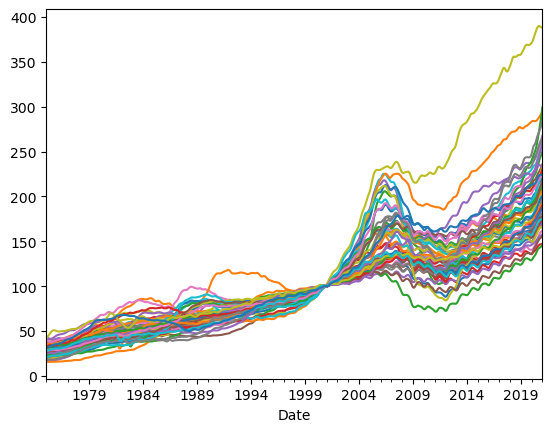

In [6]:
HPI_data.plot()
plt.legend().remove() 
plt.show()

### Percent Change (P2P) while gathering the data into a dataframe

7) Write the code (modify bulk download code above) to do a percent change as the data bulk downloaded into a Percent Change (P2P) Dataframe:

In [7]:
fifty_states = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')
fifty_states = fifty_states[0]['Postal Code']

main_df = pd.DataFrame()

for abbv in fifty_states:
    query = "FMAC/HPI_"+str(abbv)
    df = quandl.get(query, authtoken=api_key)
    df = df[['NSA Value']]
    df.rename(columns={'NSA Value':abbv}, inplace=True)
    df = df.pct_change()

    if main_df.empty:
        main_df = df 
    else:
        main_df = main_df.join(df, lsuffix=abbv)
        

main_df.to_pickle('fifty_states_pc_p2p_get.pickle')
fifty_states_pc_p2p_get = pd.read_pickle('fifty_states_pc_p2p_get.pickle')

8) Print the new Percent Change (P2P) Dataframe head:

In [8]:
print(fifty_states_pc_p2p_get.head())

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-02-28  0.010268  0.013665  0.016069  0.000886  0.004315  0.011531   
1975-03-31  0.010628  0.013951  0.014175  0.000421  0.012354  0.011952   
1975-04-30  0.011317  0.014961  0.009551  0.000610  0.019451  0.011106   
1975-05-31  0.009364  0.017300  0.003204  0.002289  0.015304  0.008148   

                  CT        DE        DC        FL  ...        SD        TN  \
Date                                                ...                       
1975-01-31       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1975-02-28  0.022107  0.002346 -0.007632  0.040413  ... -0.004207  0.001540   
1975-03-31  0.017566  0.002873 -0.006163  0.057944  ... -0.004207  0.002617   
1975-04-30  0.011548  0.004448 -0.001746  0.067457  ... -0.004108  0.003846   
1975-05

9) Graph the new Percent Change (P2P) Dataframe without the legend:

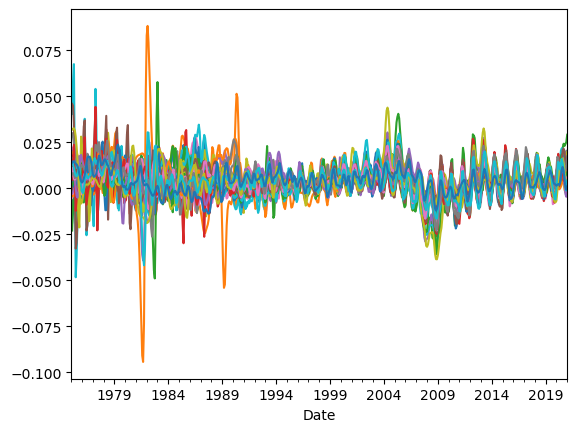

In [9]:
fifty_states_pc_p2p_get.plot() 
plt.legend().remove()
plt.show()

### Percent Change (P2P) applied to an existing DataFrame

10) Read the raw pickled data into a new Dataframe:

In [10]:
fifty_states_pc_p2p_df = pd.read_pickle('fifty_states_raw_data.pickle')

11) Print the new Dataframe head:

In [11]:
print(fifty_states_pc_p2p_df.head())

                   AL         AK         AZ         AR         CA         CO  \
Date                                                                           
1975-01-31  35.117405  34.416476  29.020458  37.888201  15.817098  19.733203   
1975-02-28  35.477995  34.886789  29.486792  37.921782  15.885345  19.960739   
1975-03-31  35.855067  35.373478  29.904774  37.937738  16.081592  20.199303   
1975-04-30  36.260853  35.902714  30.190401  37.960876  16.394394  20.423637   
1975-05-31  36.600401  36.523839  30.287116  38.047760  16.645288  20.590041   

                   CT         DE         DC         FL  ...         SD  \
Date                                                    ...              
1975-01-31  24.243323  27.711210  19.450298  30.830402  ...  35.959119   
1975-02-28  24.779281  27.776224  19.301845  32.076347  ...  35.807824   
1975-03-31  25.214553  27.856035  19.182882  33.934976  ...  35.657197   
1975-04-30  25.505742  27.979929  19.149391  36.224113  ...  35.51073

12) Convert the entire new Dataframe data to a P2P percent change Dataframe:

In [12]:
fifty_states_pc_p2p_df = fifty_states_pc_p2p_df.pct_change()

13) Print the converted Dataframe head:

In [13]:
print(fifty_states_pc_p2p_df.head())

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-02-28  0.010268  0.013665  0.016069  0.000886  0.004315  0.011531   
1975-03-31  0.010628  0.013951  0.014175  0.000421  0.012354  0.011952   
1975-04-30  0.011317  0.014961  0.009551  0.000610  0.019451  0.011106   
1975-05-31  0.009364  0.017300  0.003204  0.002289  0.015304  0.008148   

                  CT        DE        DC        FL  ...        SD        TN  \
Date                                                ...                       
1975-01-31       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1975-02-28  0.022107  0.002346 -0.007632  0.040413  ... -0.004207  0.001540   
1975-03-31  0.017566  0.002873 -0.006163  0.057944  ... -0.004207  0.002617   
1975-04-30  0.011548  0.004448 -0.001746  0.067457  ... -0.004108  0.003846   
1975-05

14) Graph the converted Dataframe without the legend:

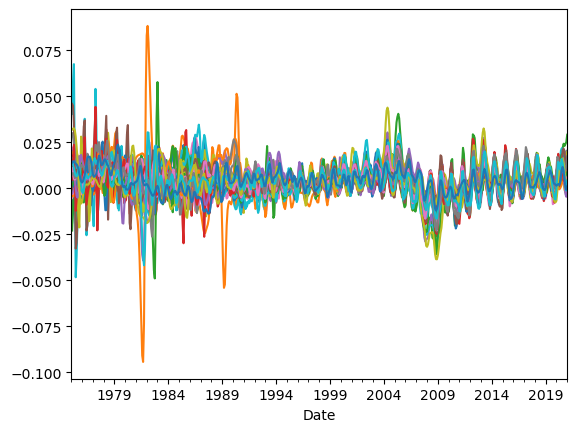

In [14]:
fifty_states_pc_p2p_df.plot() 
plt.legend().remove()
plt.show()

### Percent change from a single starting point

15) Write the code (modify bulk download code above) to do a percent change from a single starting point as the data bulk downloaded into a Percent Change (SSP) Dataframe:

In [15]:
main_df = pd.DataFrame()

for abbv in fifty_states:
    query = "FMAC/HPI_"+str(abbv)
    df = quandl.get(query, authtoken=api_key) 
    df = df[['NSA Value']]
    df.rename(columns={'NSA Value':abbv}, inplace=True)
    df[abbv] = (df[abbv]-df[abbv][0]) / df[abbv][0] * 100.0
        
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df) 

main_df.to_pickle('fifty_states_pc_ssp.pickle') 
HPI_data = pd.read_pickle('fifty_states_pc_ssp.pickle')

16) Print the Percent Change (SSP) Dataframe head:

In [16]:
print(HPI_data.head())

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1975-02-28  1.026811  1.366536  1.606915  0.088631  0.431478  1.153063   
1975-03-31  2.100558  2.780650  3.047215  0.130747  1.672205  2.362009   
1975-04-30  3.256070  4.318391  4.031442  0.191814  3.649824  3.498844   
1975-05-31  4.222965  6.123124  4.364707  0.421132  5.236042  4.342115   

                  CT        DE        DC         FL  ...        SD        TN  \
Date                                                 ...                       
1975-01-31  0.000000  0.000000  0.000000   0.000000  ...  0.000000  0.000000   
1975-02-28  2.210747  0.234615 -0.763240   4.041288  ... -0.420742  0.154026   
1975-03-31  4.006177  0.522625 -1.374869  10.069846  ... -0.839627  0.416084   
1975-04-30  5.207285  0.969714 -1.547057  17.494781  ... -1.246934  0.802254   
1

17) Graph the Percent Change (SSP) Dataframe without the legend:

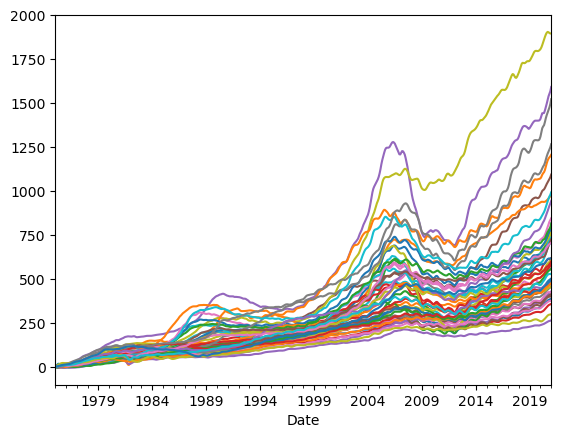

In [17]:
HPI_data.plot()
plt.legend().remove()
plt.show()

18) Graph the 'TX', 'AZ' columns from the Percent Change (SSP) Dataframe only and show the legend:

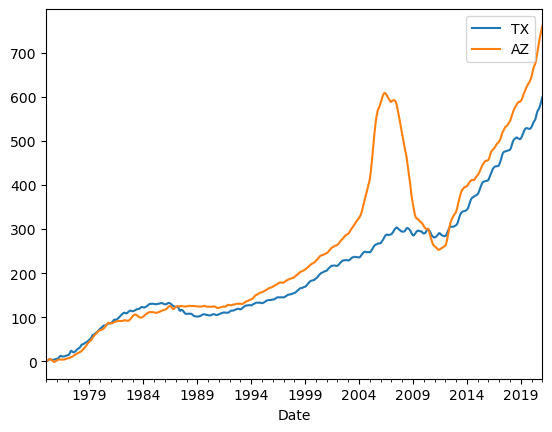

In [18]:
HPI_data[['TX','AZ']].plot()
plt.legend()
plt.show()

### Percent Change (SSP) applied to an existing DataFrame

19) Read the raw pickled data into a new Dataframe:

In [19]:
Pct_Chg_P2P = pd.read_pickle('fifty_states_raw_data.pickle')

20) Print the new Dataframe head:

In [20]:
print(Pct_Chg_P2P.head())

                   AL         AK         AZ         AR         CA         CO  \
Date                                                                           
1975-01-31  35.117405  34.416476  29.020458  37.888201  15.817098  19.733203   
1975-02-28  35.477995  34.886789  29.486792  37.921782  15.885345  19.960739   
1975-03-31  35.855067  35.373478  29.904774  37.937738  16.081592  20.199303   
1975-04-30  36.260853  35.902714  30.190401  37.960876  16.394394  20.423637   
1975-05-31  36.600401  36.523839  30.287116  38.047760  16.645288  20.590041   

                   CT         DE         DC         FL  ...         SD  \
Date                                                    ...              
1975-01-31  24.243323  27.711210  19.450298  30.830402  ...  35.959119   
1975-02-28  24.779281  27.776224  19.301845  32.076347  ...  35.807824   
1975-03-31  25.214553  27.856035  19.182882  33.934976  ...  35.657197   
1975-04-30  25.505742  27.979929  19.149391  36.224113  ...  35.51073

21) Convert the entire new Dataframe data to a SSP percent change Dataframe:

In [21]:
for abbv in fifty_states:
    Pct_Chg_P2P[abbv] = (Pct_Chg_P2P[abbv] - Pct_Chg_P2P[abbv][0])/Pct_Chg_P2P[abbv][0] * 100

22) Print the converted Dataframe head:

In [22]:
print(Pct_Chg_P2P.head())

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1975-02-28  1.026811  1.366536  1.606915  0.088631  0.431478  1.153063   
1975-03-31  2.100558  2.780650  3.047215  0.130747  1.672205  2.362009   
1975-04-30  3.256070  4.318391  4.031442  0.191814  3.649824  3.498844   
1975-05-31  4.222965  6.123124  4.364707  0.421132  5.236042  4.342115   

                  CT        DE        DC         FL  ...        SD        TN  \
Date                                                 ...                       
1975-01-31  0.000000  0.000000  0.000000   0.000000  ...  0.000000  0.000000   
1975-02-28  2.210747  0.234615 -0.763240   4.041288  ... -0.420742  0.154026   
1975-03-31  4.006177  0.522625 -1.374869  10.069846  ... -0.839627  0.416084   
1975-04-30  5.207285  0.969714 -1.547057  17.494781  ... -1.246934  0.802254   
1

23) Graph the converted Dataframe without the legend:

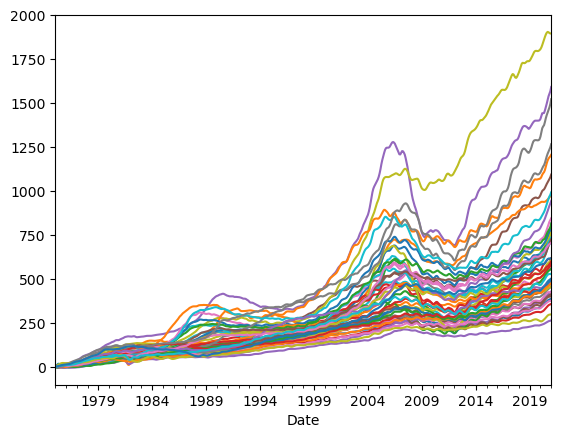

In [23]:
Pct_Chg_P2P.plot()
plt.legend().remove()
plt.show()

## Correlation & Description

24) Write the code to read the pickled date into a Dataframe and create a correlation table from the Dataframe. Display the table:

In [24]:
HPI_data = pd.read_pickle('fifty_states_raw_data.pickle')
HPI_State_Correlation = HPI_data.corr() 

print(HPI_State_Correlation)

          AL        AK        AZ        AR        CA        CO        CT  \
AL  1.000000  0.961435  0.953731  0.996755  0.957153  0.955368  0.941009   
AK  0.961435  1.000000  0.931675  0.976055  0.941288  0.948745  0.888306   
AZ  0.953731  0.931675  1.000000  0.952614  0.984106  0.946116  0.893247   
AR  0.996755  0.976055  0.952614  1.000000  0.960003  0.963192  0.934402   
CA  0.957153  0.941288  0.984106  0.960003  1.000000  0.954501  0.916766   
CO  0.955368  0.948745  0.946116  0.963192  0.954501  1.000000  0.837225   
CT  0.941009  0.888306  0.893247  0.934402  0.916766  0.837225  1.000000   
DE  0.982141  0.948029  0.944626  0.978236  0.961269  0.909783  0.977207   
DC  0.934364  0.968451  0.932659  0.949731  0.958795  0.964521  0.855204   
FL  0.948720  0.927115  0.995972  0.947965  0.990964  0.940478  0.902519   
GA  0.981040  0.926433  0.968191  0.975369  0.968797  0.968375  0.915903   
HI  0.959617  0.959640  0.945021  0.965184  0.968515  0.944363  0.901416   
ID  0.963078

25) Print a data description of the raw data Dataframe (not the correlation table):

In [25]:
print(HPI_State_Correlation.describe())

              AL         AK         AZ         AR         CA         CO  \
count  51.000000  51.000000  51.000000  51.000000  51.000000  51.000000   
mean    0.973457   0.951596   0.949467   0.975089   0.958970   0.952092   
std     0.020405   0.030714   0.020025   0.020151   0.017040   0.030352   
min     0.909400   0.837067   0.893247   0.902033   0.910001   0.837225   
25%     0.963356   0.940508   0.938241   0.967052   0.950804   0.939523   
50%     0.978515   0.957922   0.951392   0.978236   0.959795   0.955629   
75%     0.986840   0.968299   0.958866   0.990401   0.969882   0.971508   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

              CT         DE         DC         FL  ...         SD         TN  \
count  51.000000  51.000000  51.000000  51.000000  ...  51.000000  51.000000   
mean    0.914363   0.960051   0.942076   0.948094  ...   0.967808   0.971166   
std     0.043814   0.027420   0.034178   0.021016  ...   0.026947   0.021719   
min 